In [1]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

In [2]:
import sys
sys.path.append("../../../")

from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities
from graph_dynamics.embeddings import deep_walk

In [3]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [4]:
Macrostates.macrostate_function_dictionary.keys()

['degree_distribution',
 'basic_stats',
 'pagerank',
 'deepwalk_online',
 'new_nodes',
 'bigclam',
 'node2vec_macrostates']

In [5]:
number_of_steps = 100
number_of_steps_in_memory = 1

forest_fire_communities_parameters = {0:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},                                                                                                                                                                                                                                                                                                                                                 
                                      1:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      2:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      3:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.22,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.}}

numberOfCommunitiesAndNoise = len(forest_fire_communities_parameters.keys())

#back ground evolution
timeSeriesCommunity0 = np.ones(number_of_steps)*0
timeSeriesCommunity0[0] = 0

timeSeriesCommunity1 = np.ones(number_of_steps)*5
timeSeriesCommunity1[0] = 30

timeSeriesCommunity2 = np.ones(number_of_steps)*1
timeSeriesCommunity2[0] = 30

timeSeriesCommunity3 = np.ones(number_of_steps)*1
timeSeriesCommunity3[0] = 30

timeSeriesOfCommunities = {0:timeSeriesCommunity0,
                           1:timeSeriesCommunity1,
                           2:timeSeriesCommunity2,
                           3:timeSeriesCommunity3}

#the initial size of the community is that as defined by the time series
numberOfNodesPerCommunities = [timeSeriesOfCommunities[c][0] for c in range(1,numberOfCommunitiesAndNoise)]
numberOfBridgesPerCommunity = [2,2,2]
barabasiParameter = 3
initial_graph, subGraphs,Q,bridgesInCommunity = communities.barabasiAlbertCommunities(numberOfNodesPerCommunities, 
                                                                                      numberOfBridgesPerCommunity, 
                                                                                      barabasiParameter)
initial_communities = {c:subGraphs[c-1].nodes() for c in range(1,numberOfCommunitiesAndNoise)}
initial_communities[0]=[]


simulations_directory = "./Simulations/"

DYNAMICS_PARAMETERS = {"number_of_steps":number_of_steps,
                        "number_of_steps_in_memory":number_of_steps_in_memory,
                        "simulations_directory":simulations_directory,
                        "dynamics_identifier":"CommunityForestFire4",
                        "graph_class":"CommunityGraph",
                        "verbose":True,
                        "datetime_timeseries":False,
                        "initial_date":1}

DYNAMICS_PARAMETERS["macrostates"] =  [("basic_stats",())]
gd_directory = "./Simulations/CommunityForestFire4_gd/"

community_graph = CommunityGraph(identifier_string="Communities",
                                 initial_comunities=initial_communities,
                                 networkx_graph=initial_graph)

dynamics_object = GenerativeDynamicsCommunities.CommunitiesForestFire(community_graph,
                                                                      initial_communities,
                                                                      forest_fire_communities_parameters,
                                                                      timeSeriesOfCommunities,
                                                                      DYNAMICS_PARAMETERS)

New Dynamics Directory


# Dynamics

In [6]:
dynamics_object.evolve(100,community_graph)

#100 STEPS EVOLUTION STARTED FOR CommunityForestFire4
#STARTING EVOLUTION AT STEP 0
Number of initial nodes:  90
All graph in memory
90
last guy
90
1
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
97
last guy
97
2
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  3

[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
209
last guy
209
18
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  48

All graph in memory
307
last guy
307
32
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
314
last guy
314
33
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
412
last guy
412
47
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
419
last guy
419
48
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
503
last guy
503
60
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
510
last guy
510
61
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
594
last guy
594
73
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
601
last guy
601
74
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
685
last guy
685
86
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
692
last guy
692
87
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
776
last guy
776
99
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
783
last guy
783


In [7]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics CommunityForestFire4
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                            

In [8]:
#EVALUATE NEW NODES
window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                [("new_nodes",())], 
                                                "newnodes", 
                                                window, 
                                                rolling)

Evaluating Time 1 for newnodes
Evaluating Time 2 for newnodes
Evaluating Time 3 for newnodes
Evaluating Time 4 for newnodes
Evaluating Time 5 for newnodes
Evaluating Time 6 for newnodes
Evaluating Time 7 for newnodes
Evaluating Time 8 for newnodes
Evaluating Time 9 for newnodes
Evaluating Time 10 for newnodes
Evaluating Time 11 for newnodes
Evaluating Time 12 for newnodes
Evaluating Time 13 for newnodes
Evaluating Time 14 for newnodes
Evaluating Time 15 for newnodes
Evaluating Time 16 for newnodes
Evaluating Time 17 for newnodes
Evaluating Time 18 for newnodes
Evaluating Time 19 for newnodes
Evaluating Time 20 for newnodes
Evaluating Time 21 for newnodes
Evaluating Time 22 for newnodes
Evaluating Time 23 for newnodes
Evaluating Time 24 for newnodes
Evaluating Time 25 for newnodes
Evaluating Time 26 for newnodes
Evaluating Time 27 for newnodes
Evaluating Time 28 for newnodes
Evaluating Time 29 for newnodes
Evaluating Time 30 for newnodes
Evaluating Time 31 for newnodes
Evaluating Time 3

## Online DeepWalk

In [9]:
#EVALUATE Online DeepWalk

model = Word2Vec(size=128, window=10, min_count=0, sg=1, workers=8, iter=10)

nargs = {'model':model,
         'number_of_walks': 20,
         'walk_length': 10}

G = nx.read_edgelist(gd_directory + DYNAMICS_PARAMETERS['dynamics_identifier'] +'_gGD_0_.gd')

walks = deep_walk.walks(G, number_of_walks=nargs['number_of_walks'], walk_length=nargs['walk_length'])
walks = [map(str, walk) for walk in walks]

model.build_vocab([map(str, G.nodes())])
model.train(walks, total_examples=model.corpus_count, epochs=model.iter)

70138

In [10]:
macrostates_run_ideintifier = "deepwalk" 
macrostates_names  = [("deepwalk_online",(nargs,))]

window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                macrostates_names, 
                                                macrostates_run_ideintifier, 
                                                window, 
                                                rolling)

Evaluating Time 1 for deepwalk
Evaluating Time 2 for deepwalk
Evaluating Time 3 for deepwalk
Evaluating Time 4 for deepwalk
Evaluating Time 5 for deepwalk
Evaluating Time 6 for deepwalk
Evaluating Time 7 for deepwalk
Evaluating Time 8 for deepwalk
Evaluating Time 9 for deepwalk
Evaluating Time 10 for deepwalk
Evaluating Time 11 for deepwalk
Evaluating Time 12 for deepwalk
Evaluating Time 13 for deepwalk
Evaluating Time 14 for deepwalk
Evaluating Time 15 for deepwalk
Evaluating Time 16 for deepwalk
Evaluating Time 17 for deepwalk
Evaluating Time 18 for deepwalk
Evaluating Time 19 for deepwalk
Evaluating Time 20 for deepwalk
Evaluating Time 21 for deepwalk
Evaluating Time 22 for deepwalk
Evaluating Time 23 for deepwalk
Evaluating Time 24 for deepwalk
Evaluating Time 25 for deepwalk
Evaluating Time 26 for deepwalk
Evaluating Time 27 for deepwalk
Evaluating Time 28 for deepwalk
Evaluating Time 29 for deepwalk
Evaluating Time 30 for deepwalk
Evaluating Time 31 for deepwalk
Evaluating Time 3

# READ ALL ALIGNEMENTS

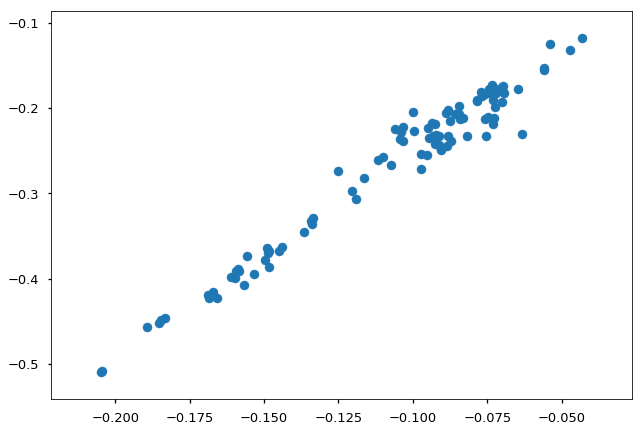

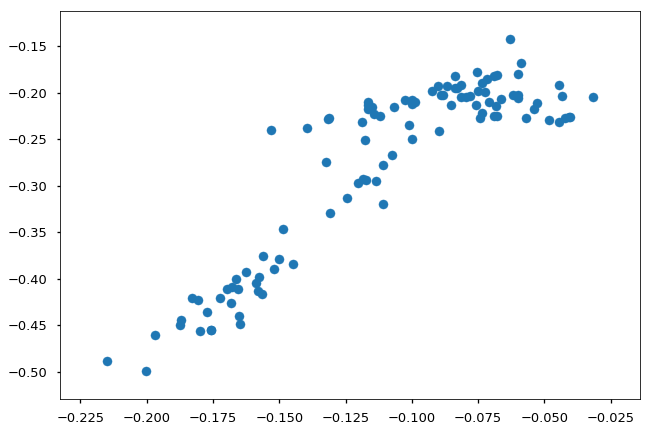

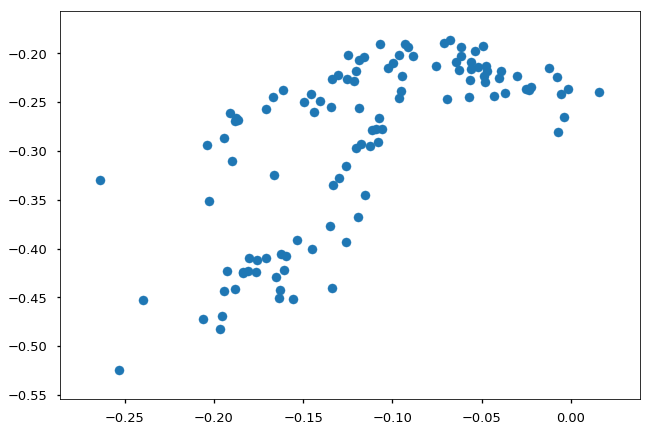

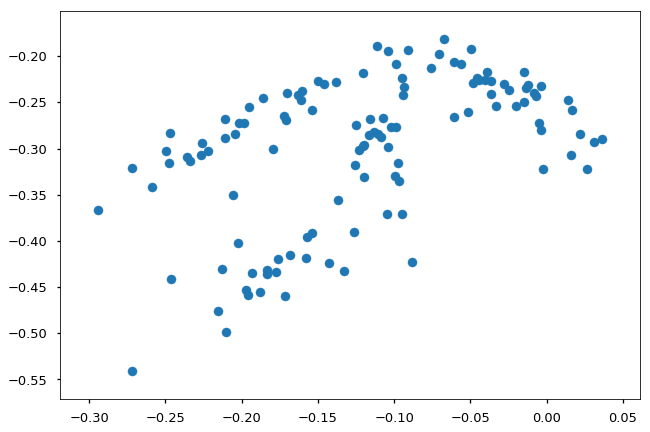

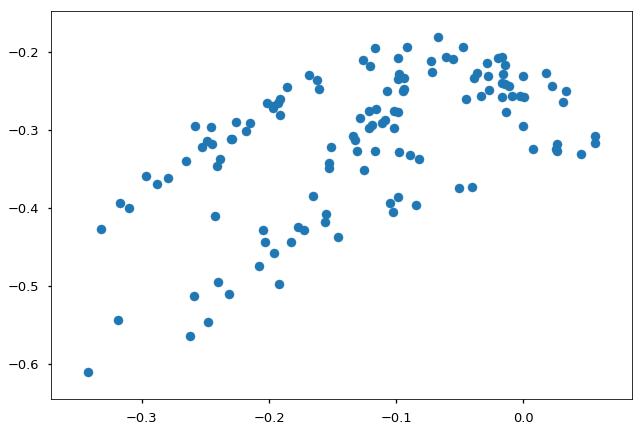

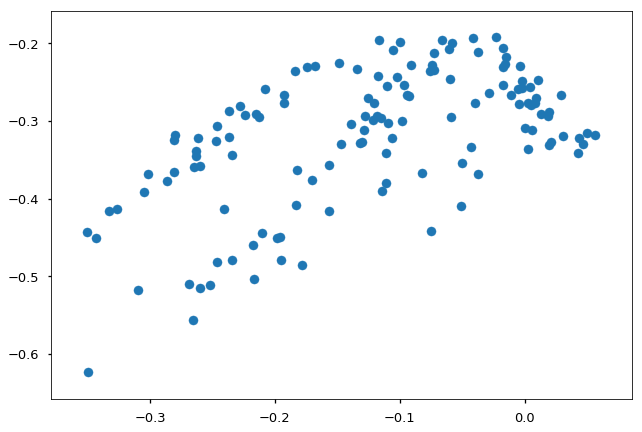

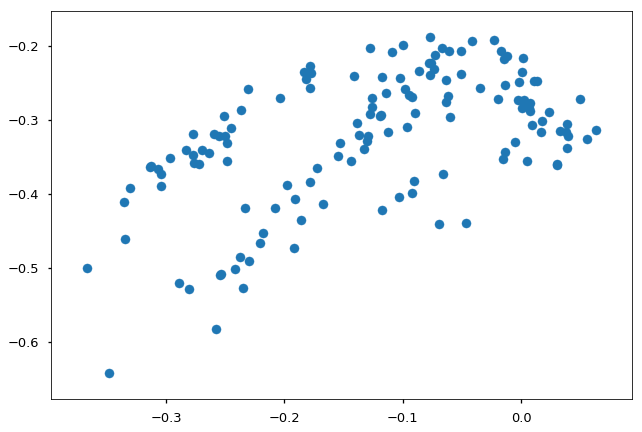

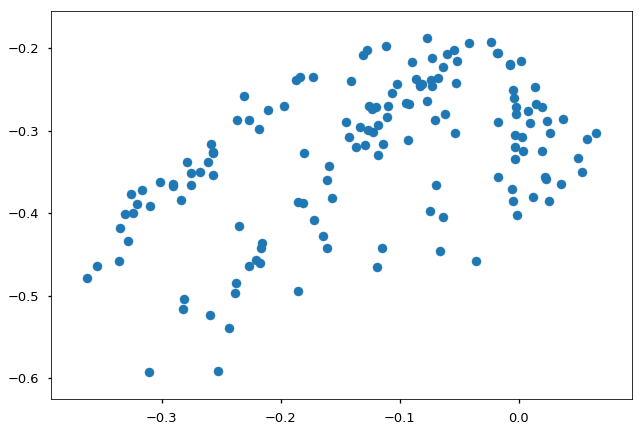

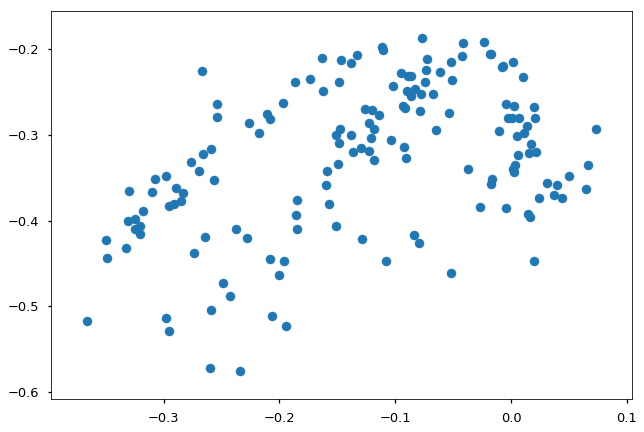

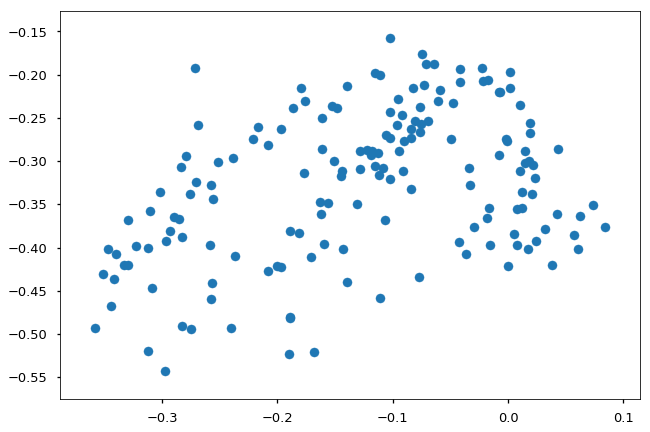

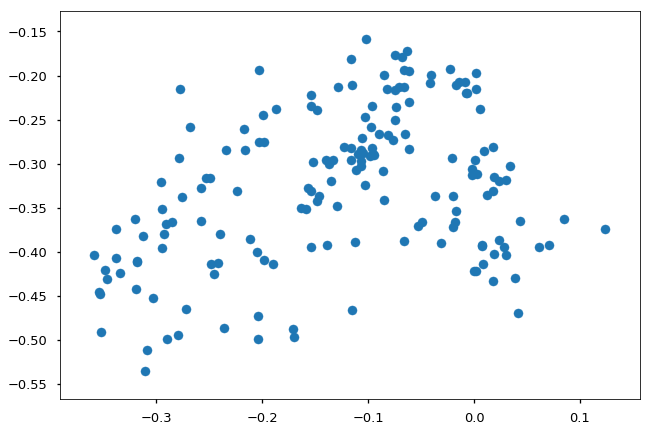

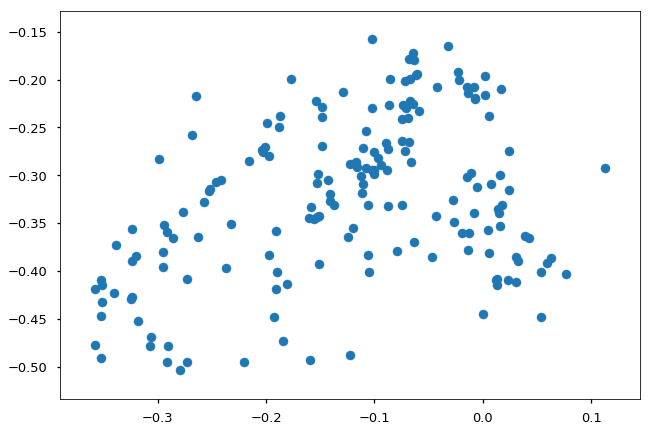

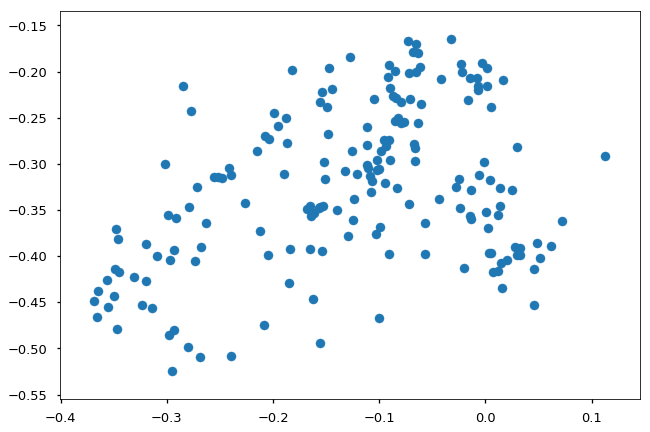

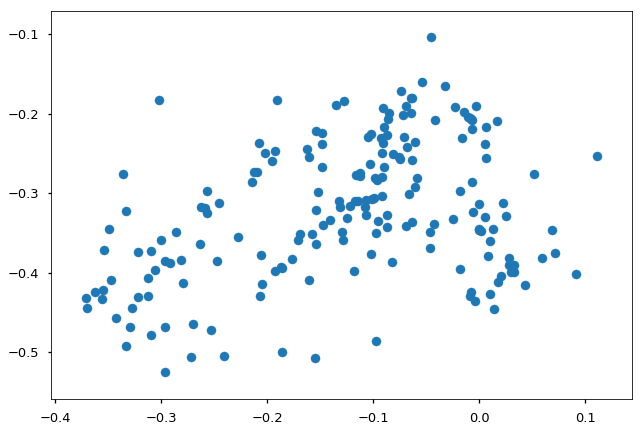

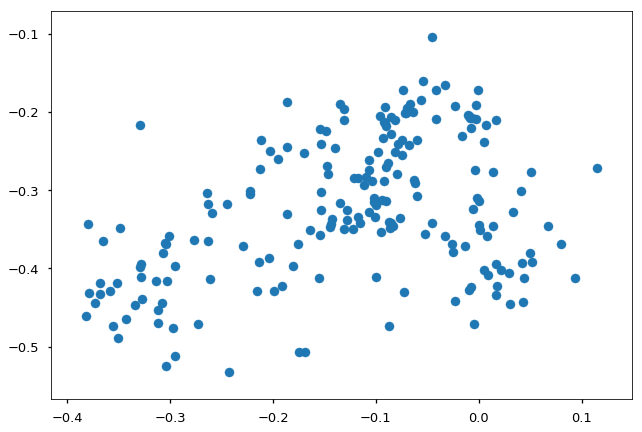

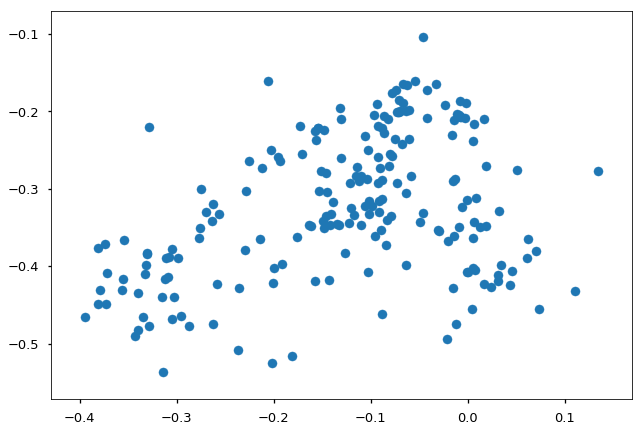

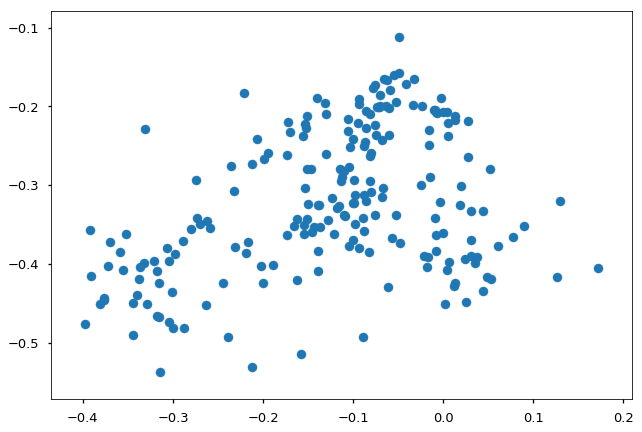

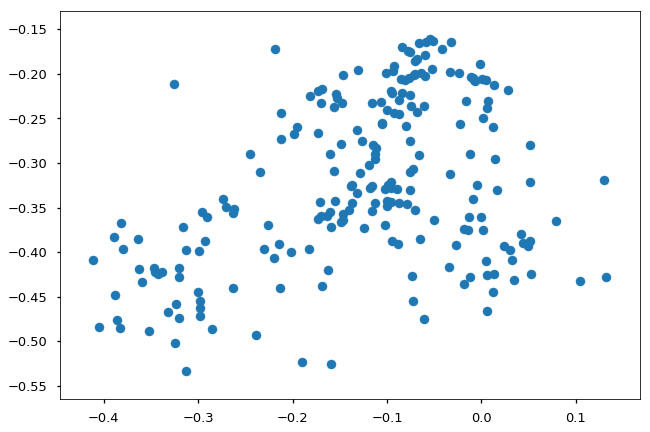

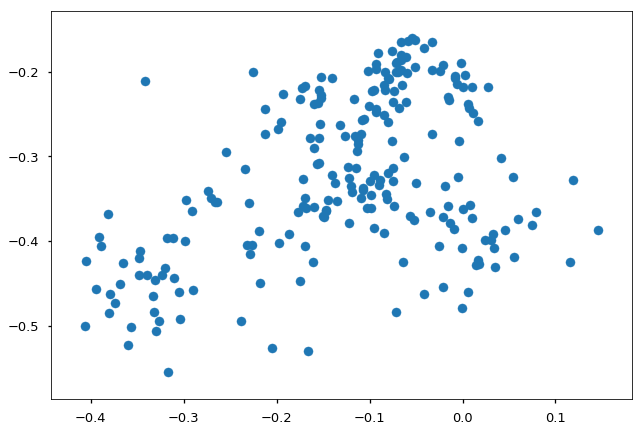

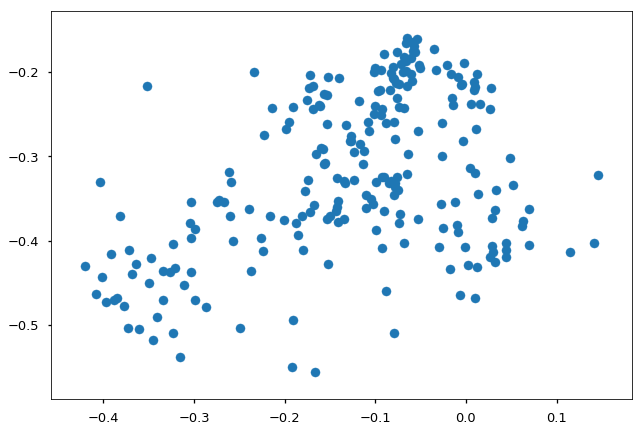

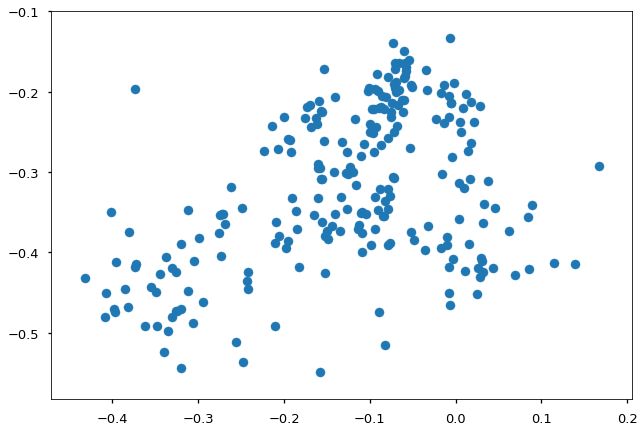

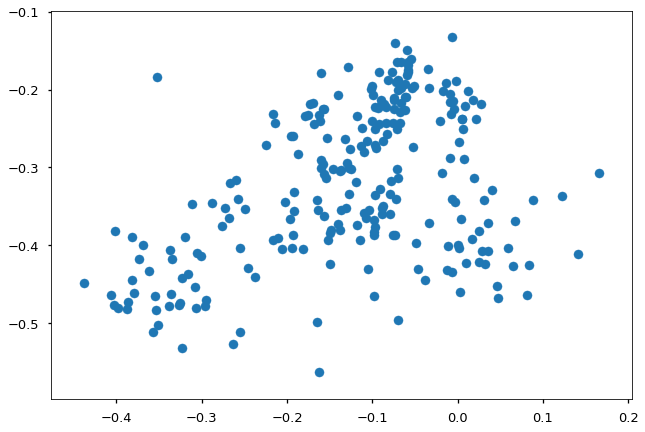

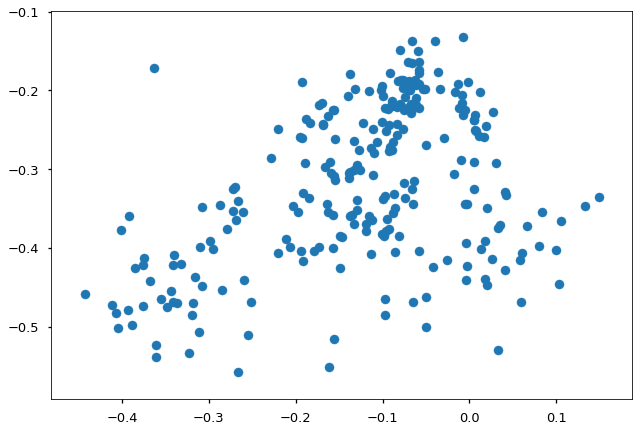

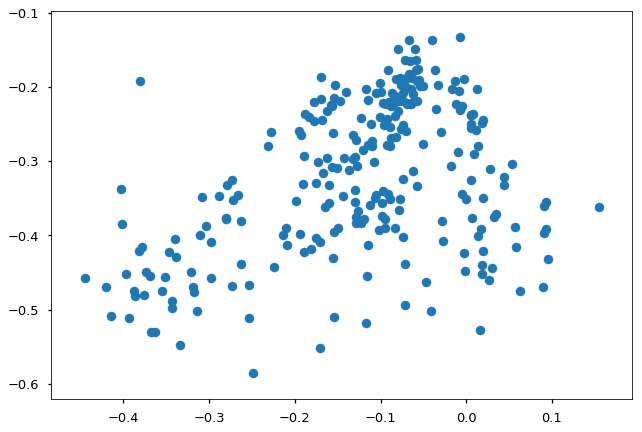

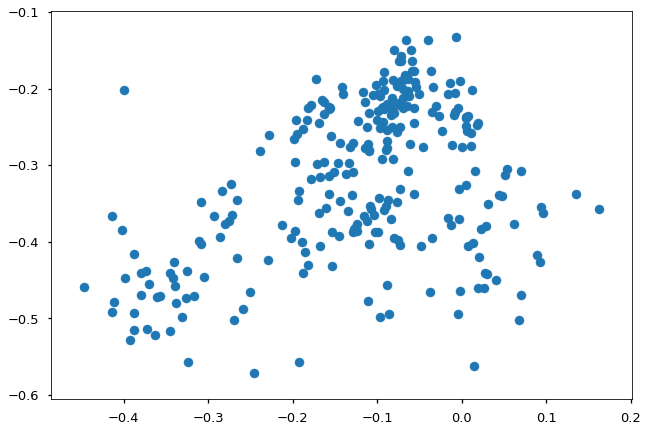

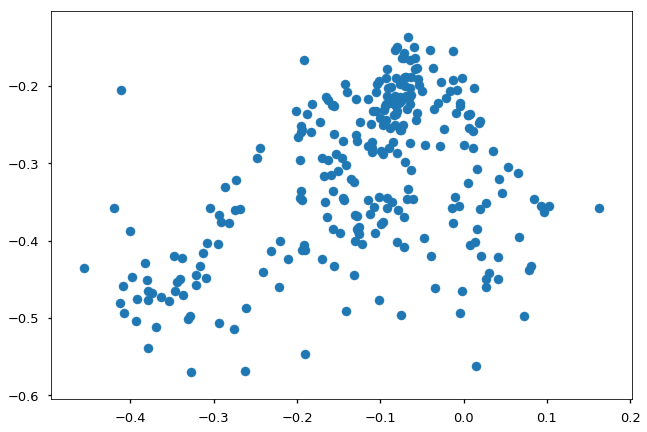

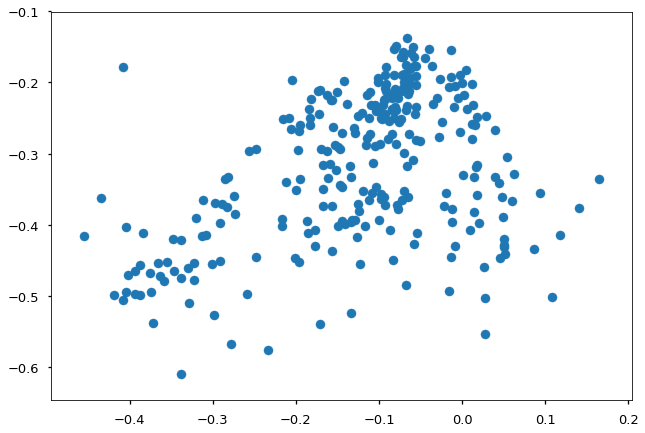

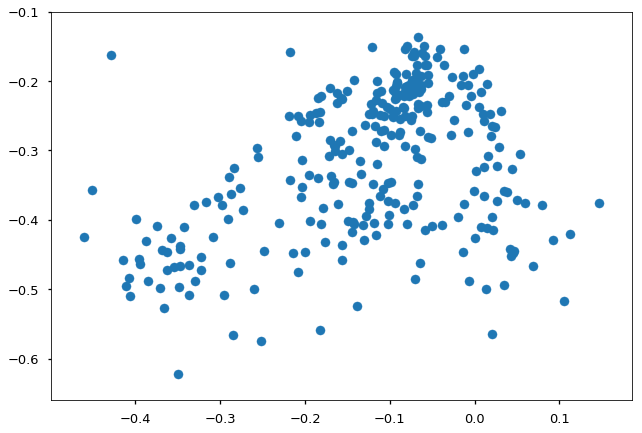

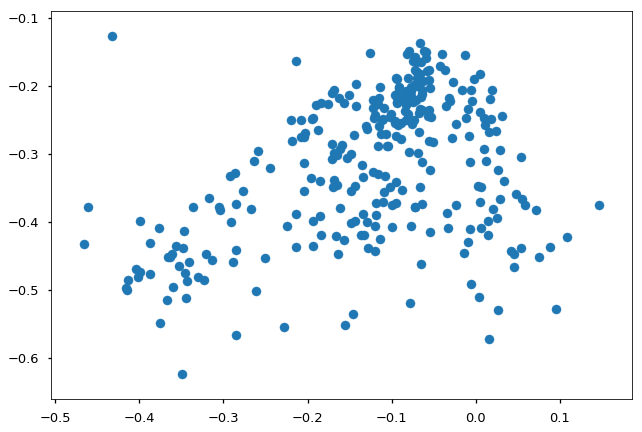

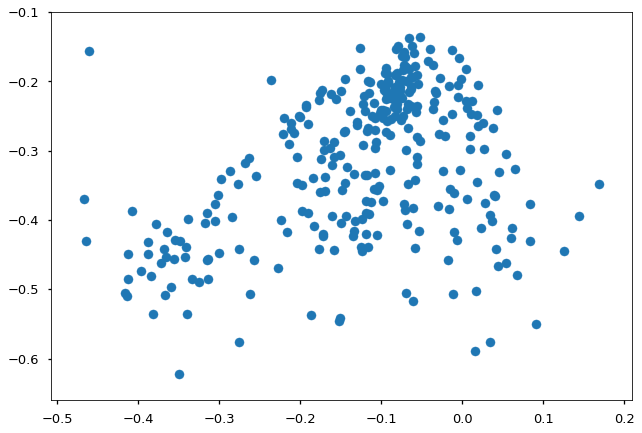

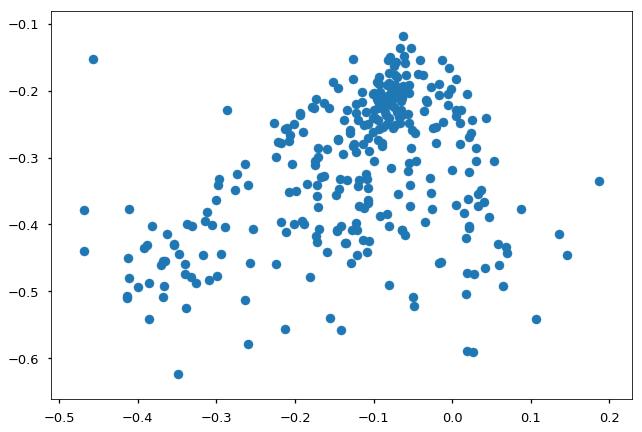

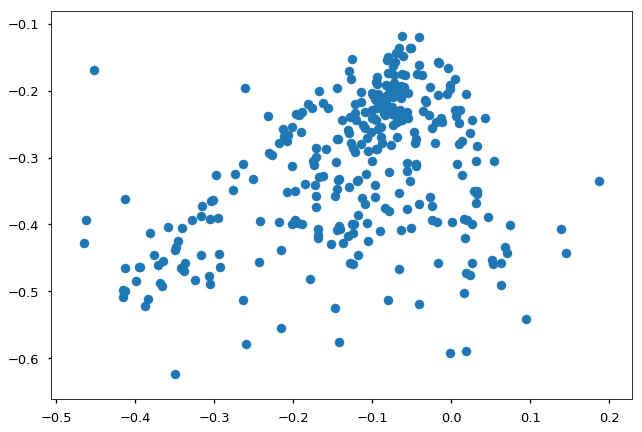

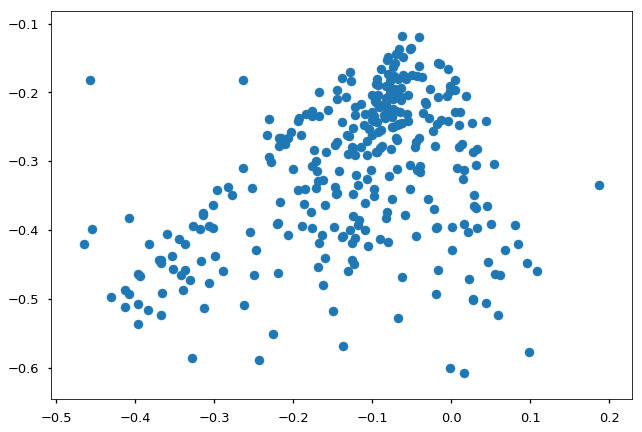

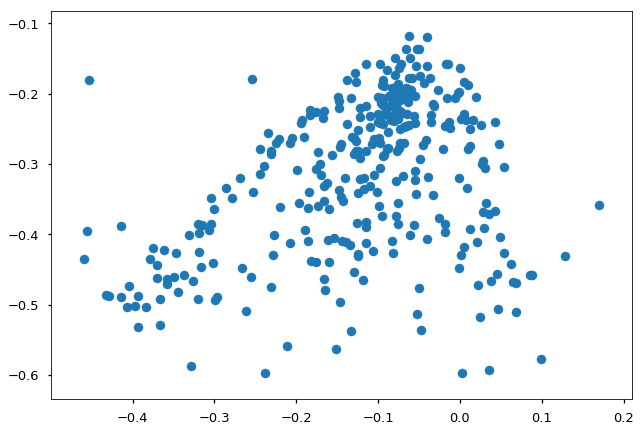

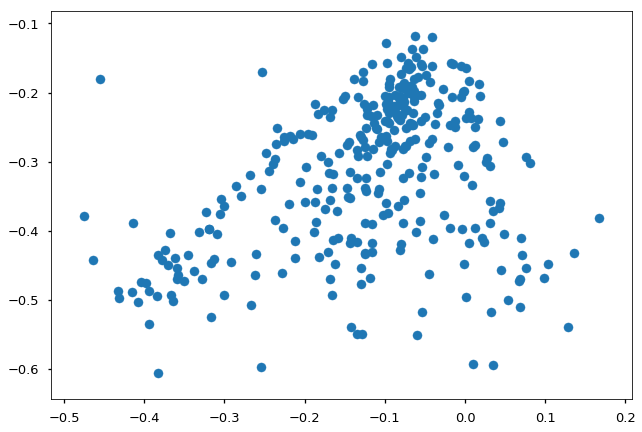

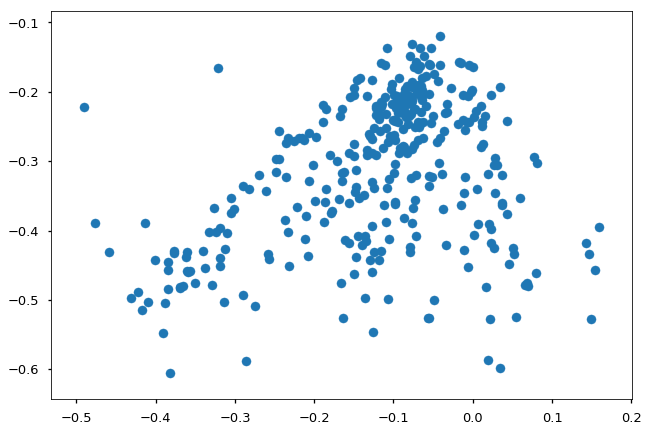

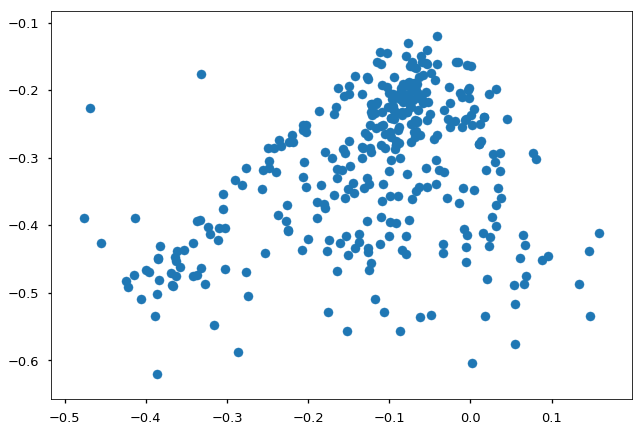

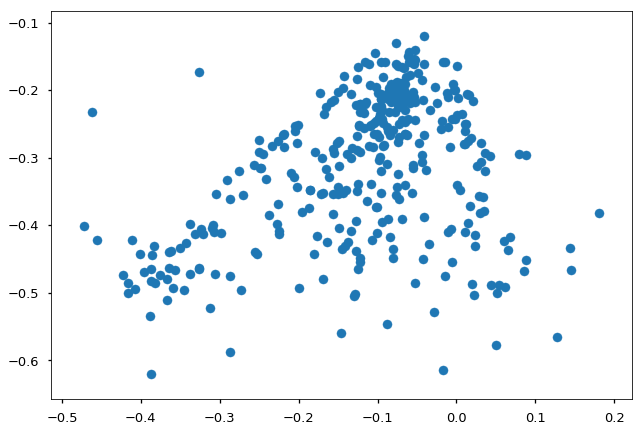

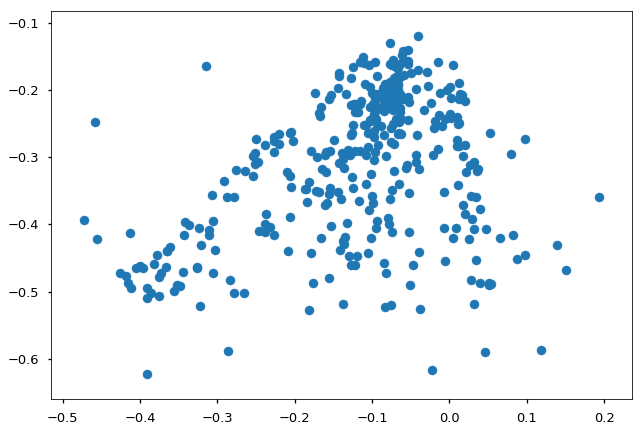

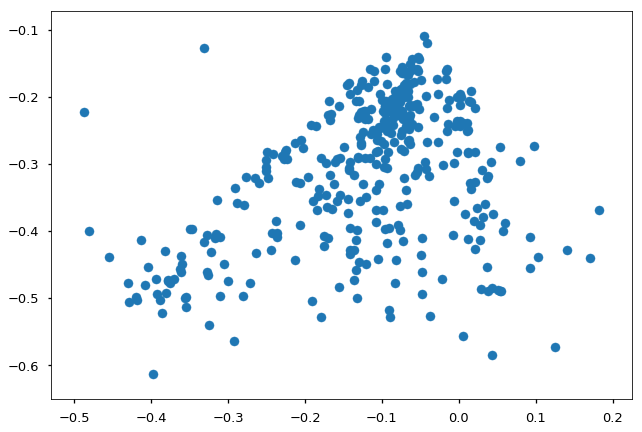

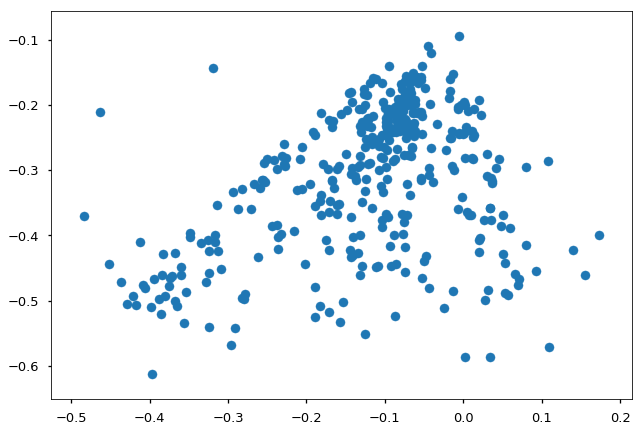

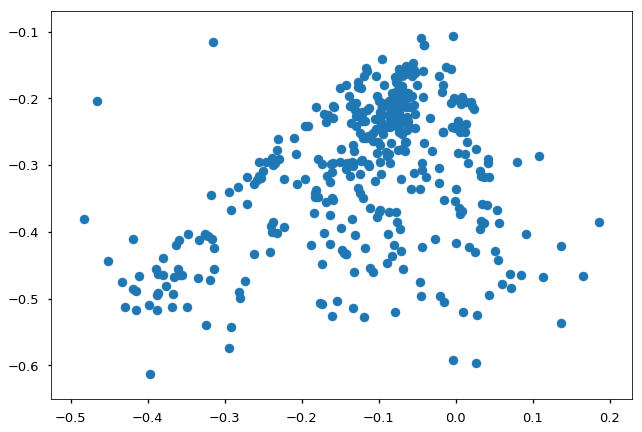

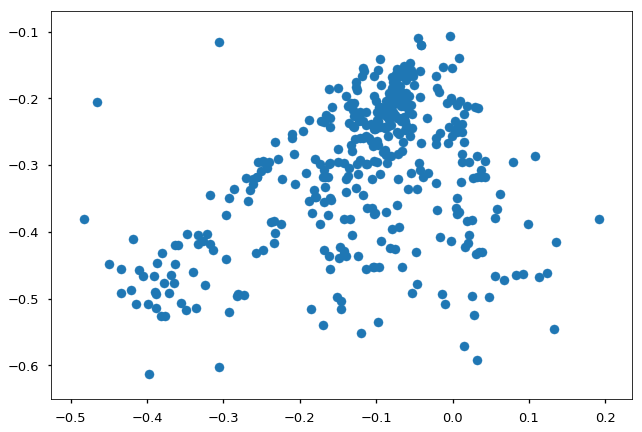

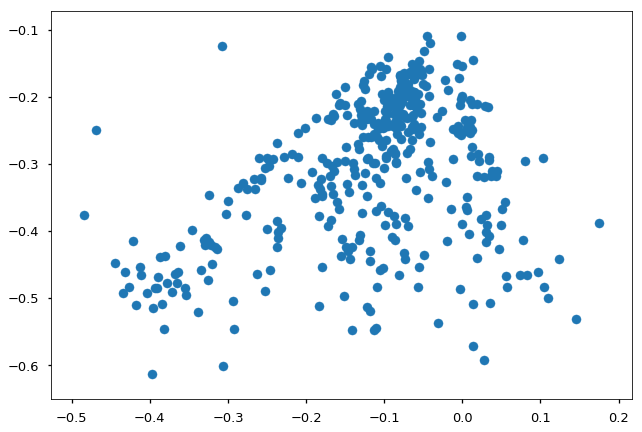

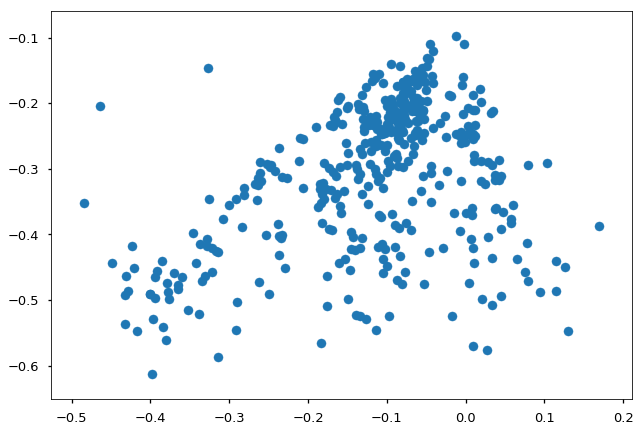

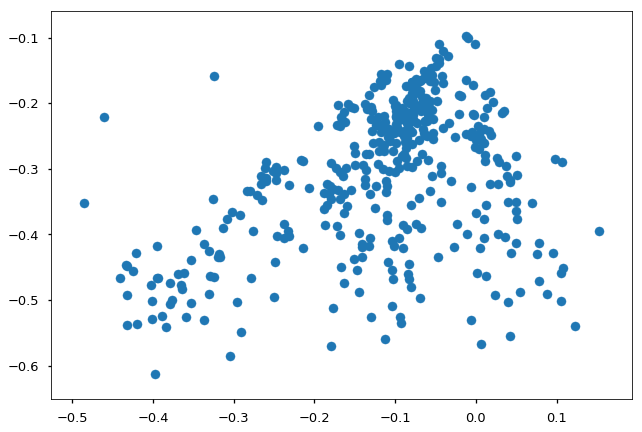

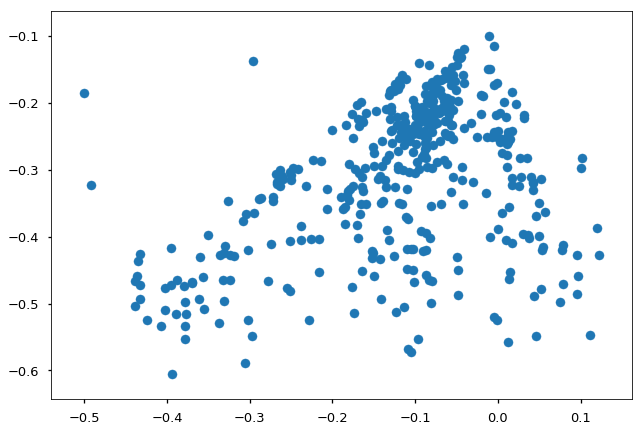

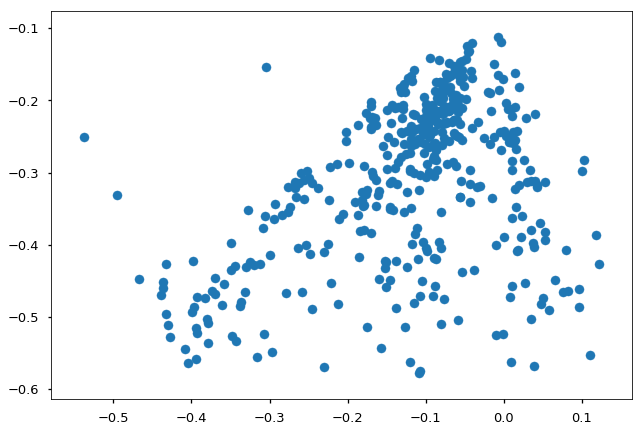

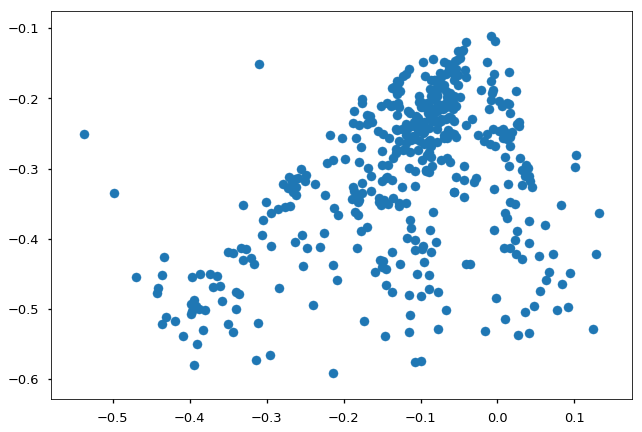

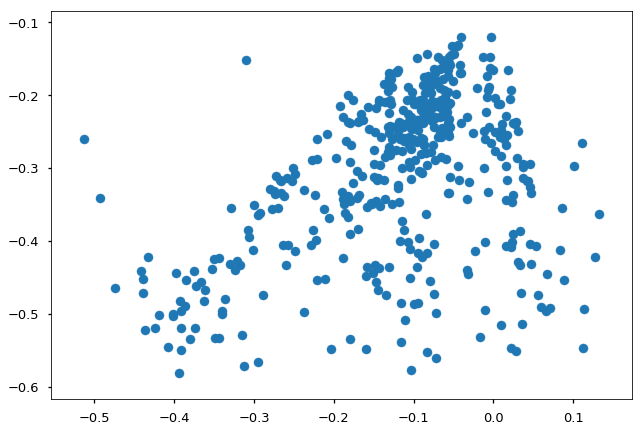

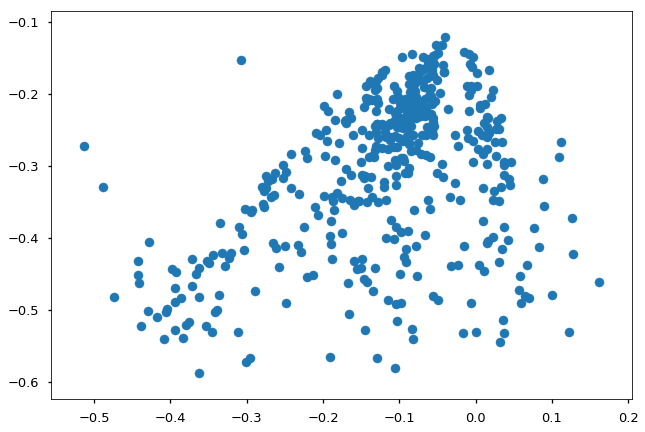

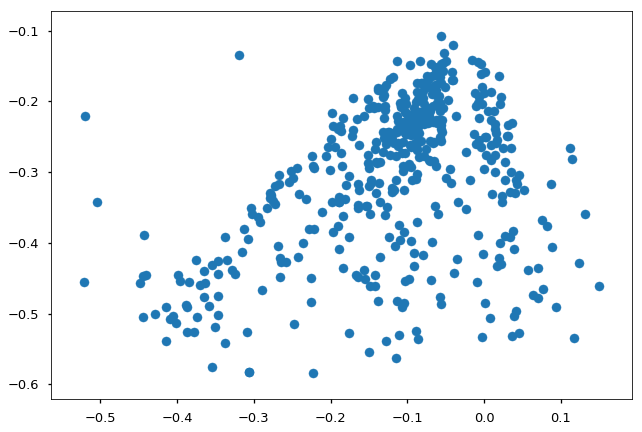

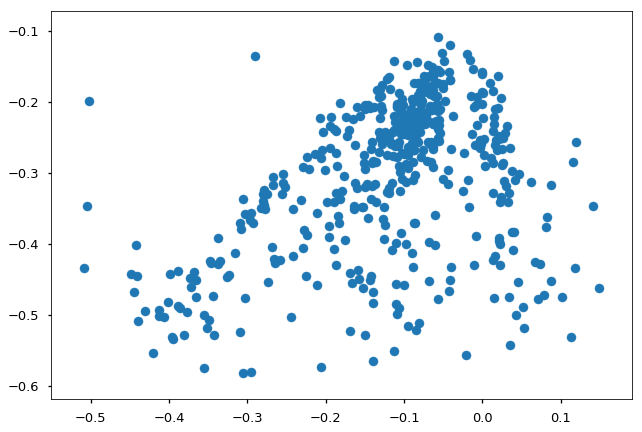

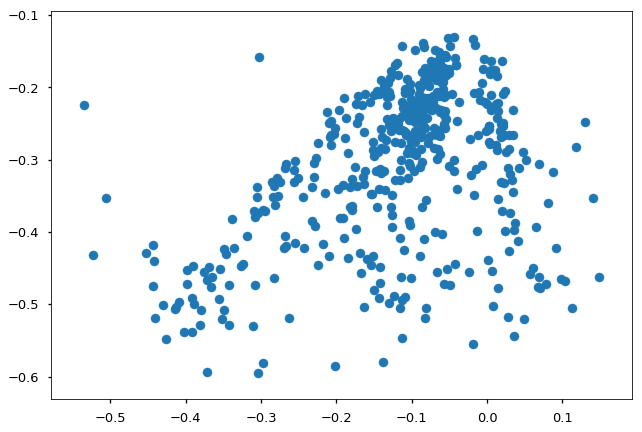

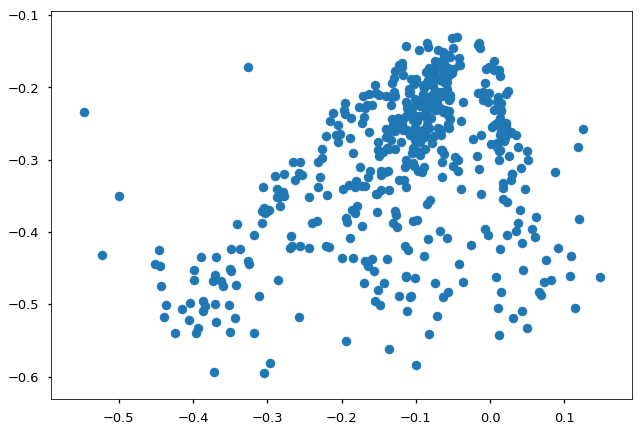

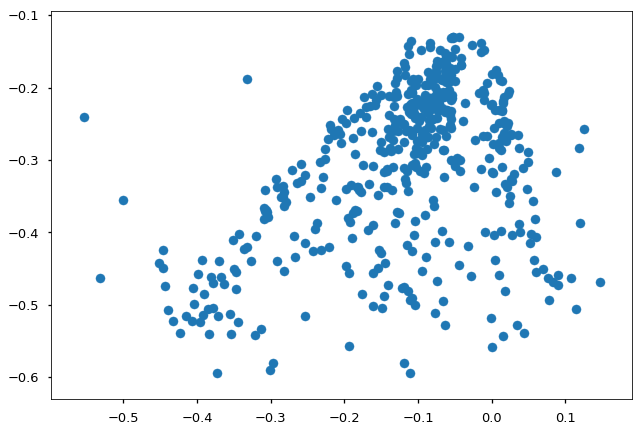

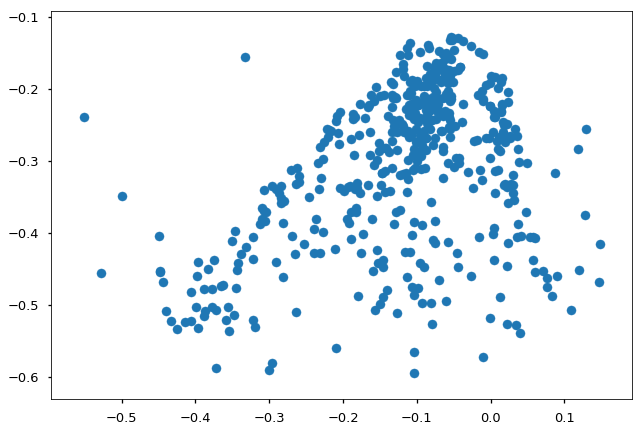

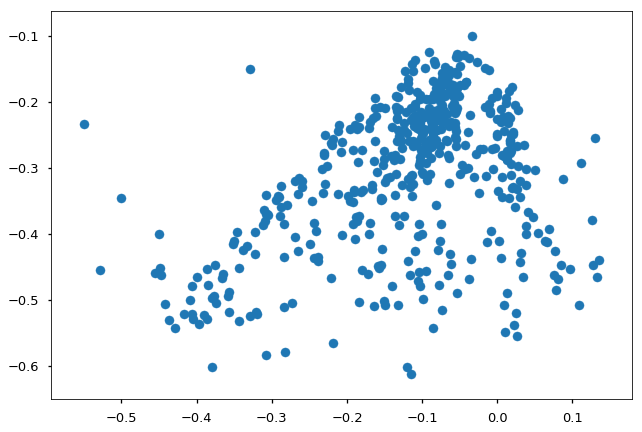

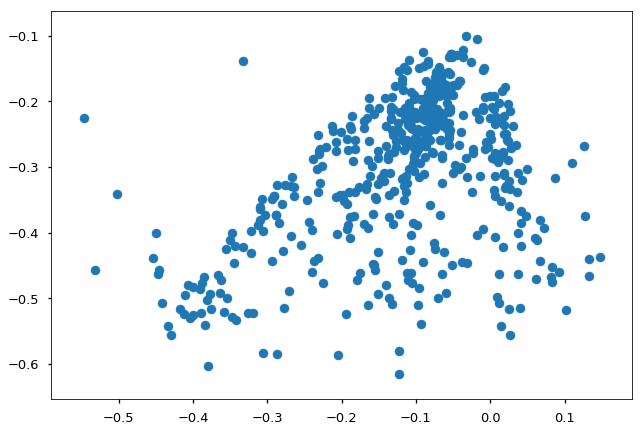

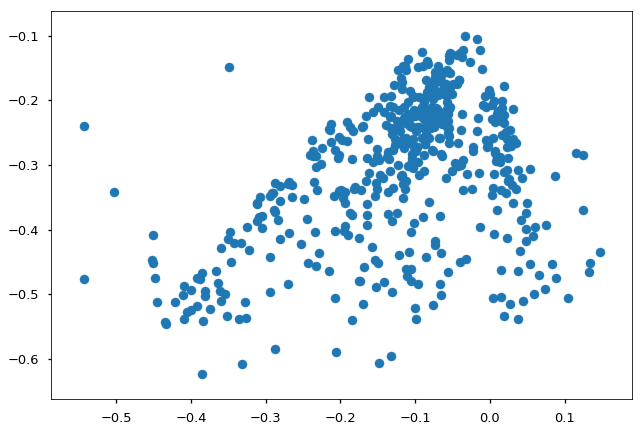

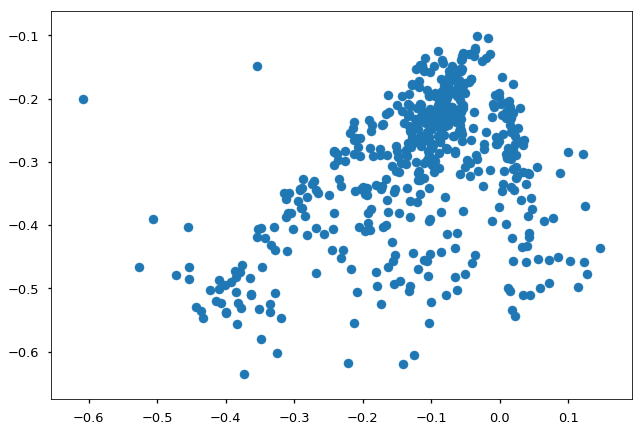

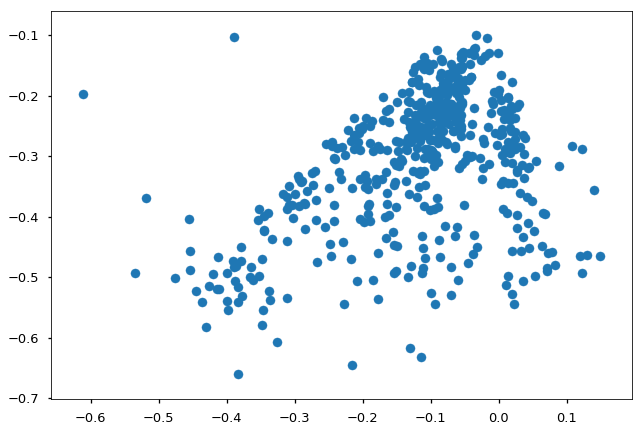

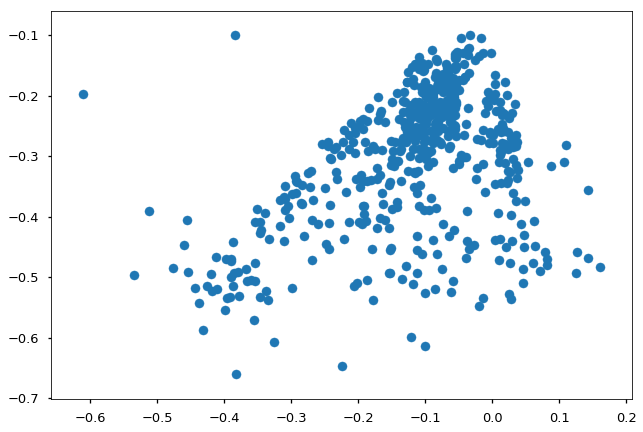

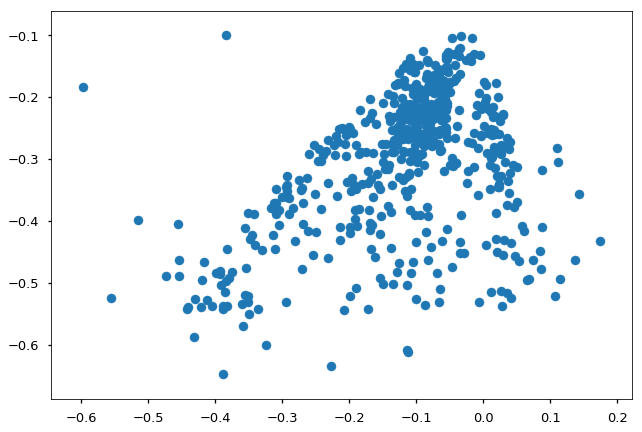

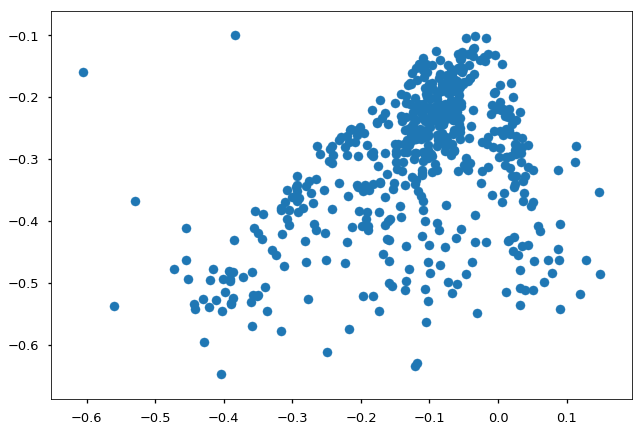

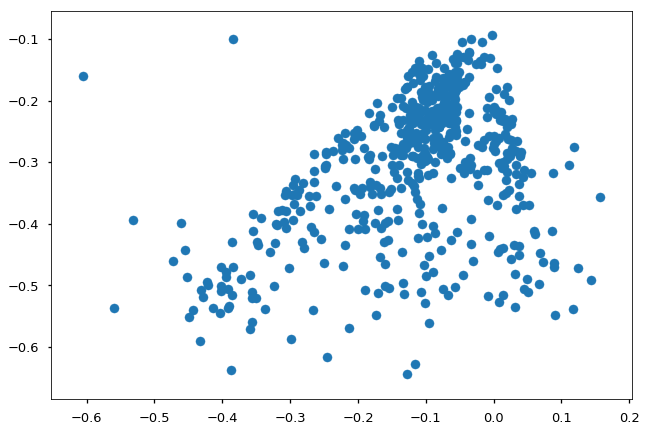

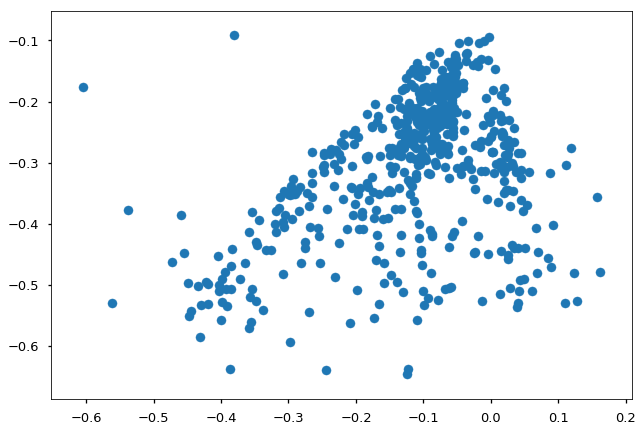

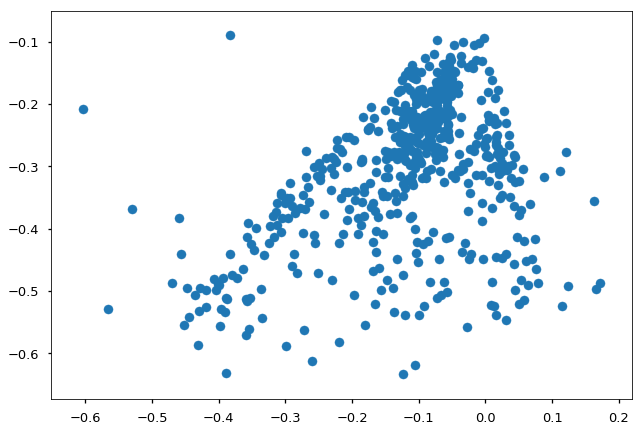

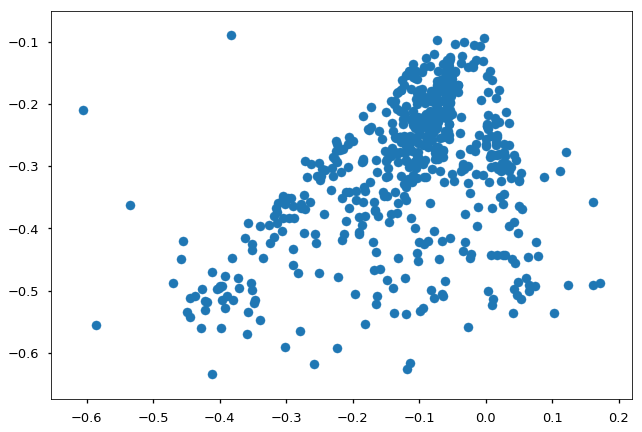

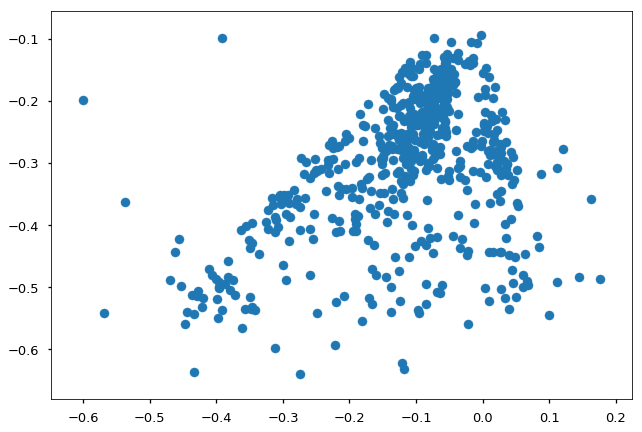

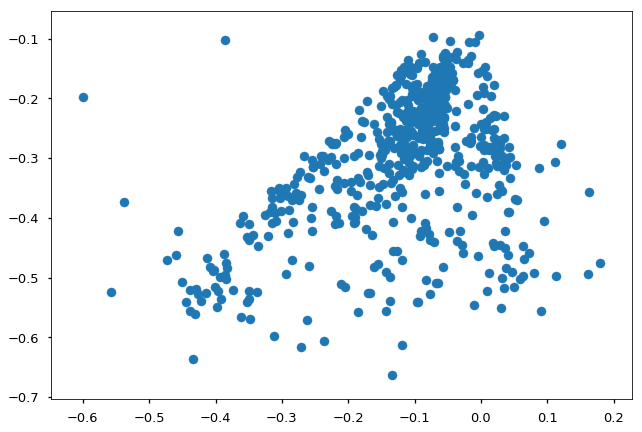

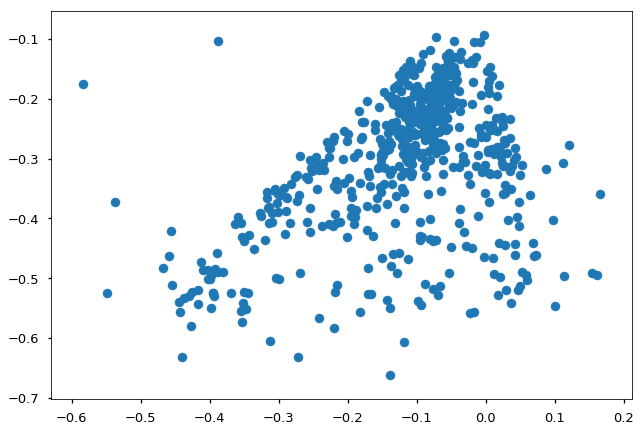

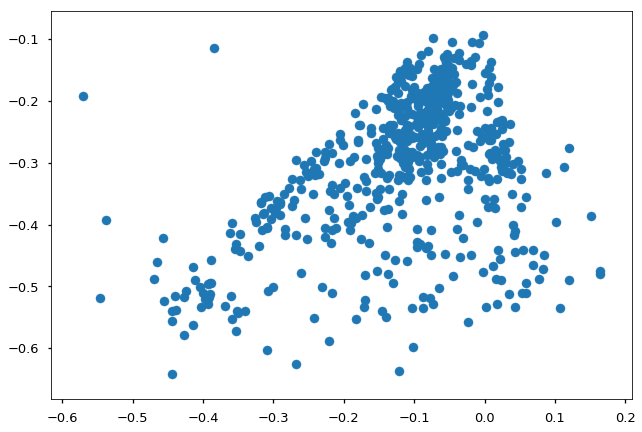

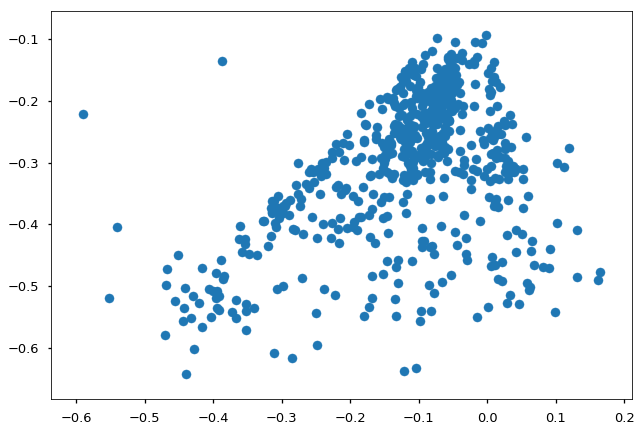

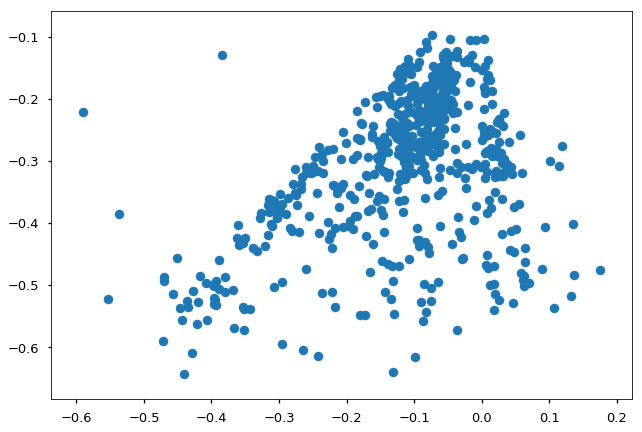

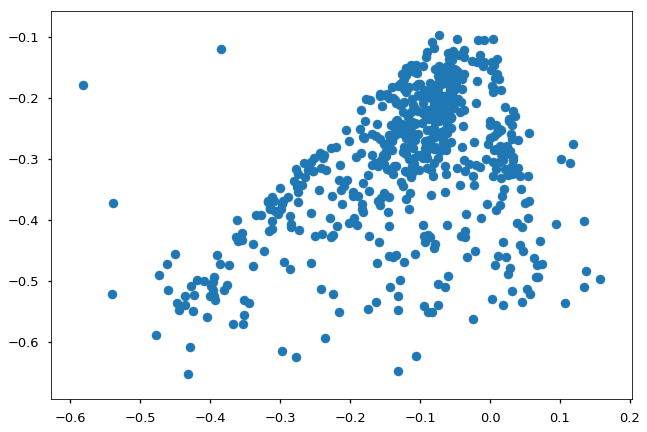

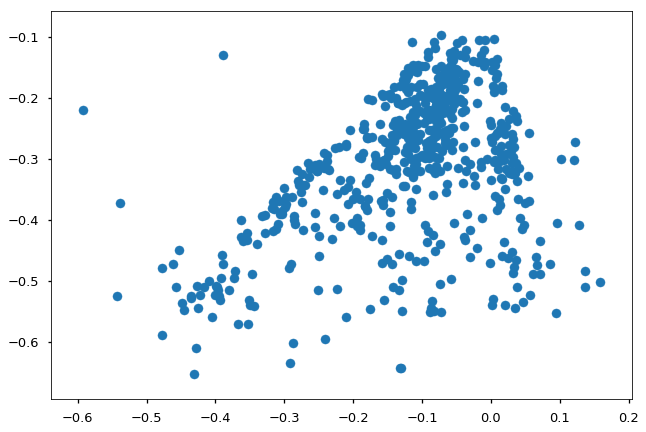

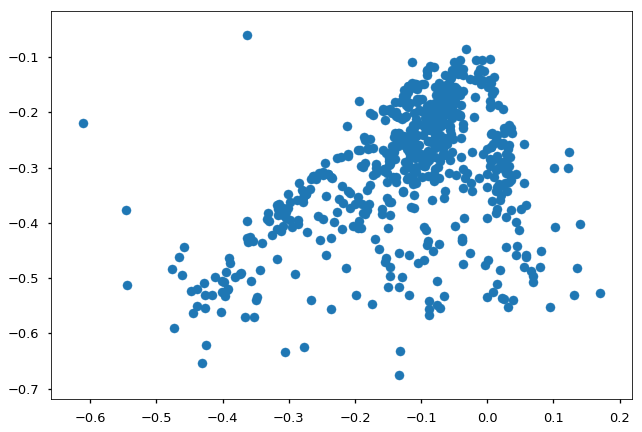

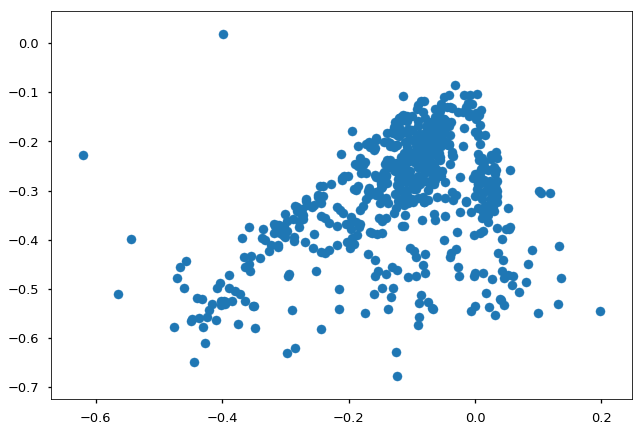

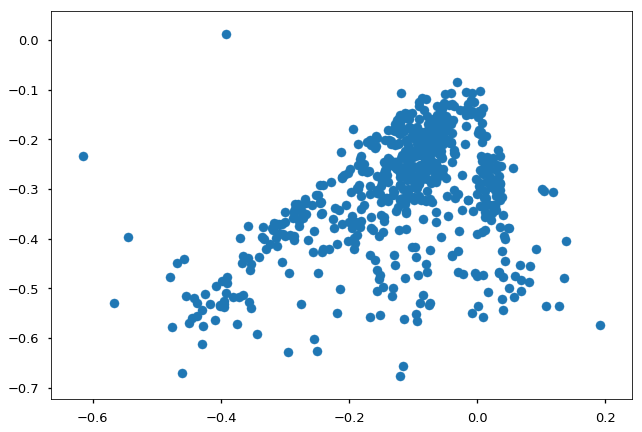

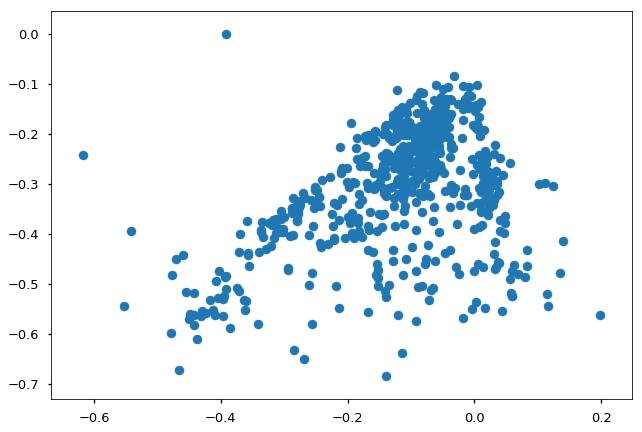

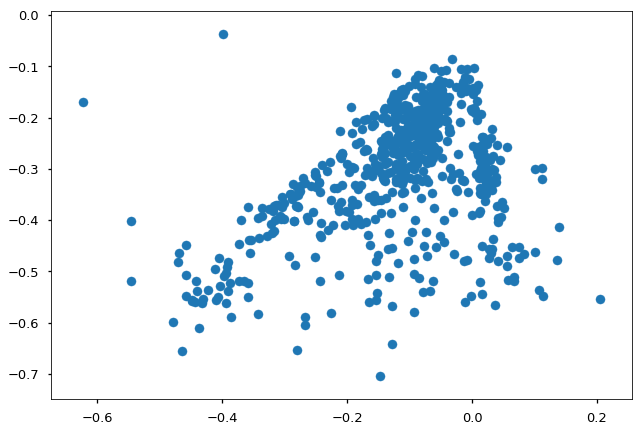

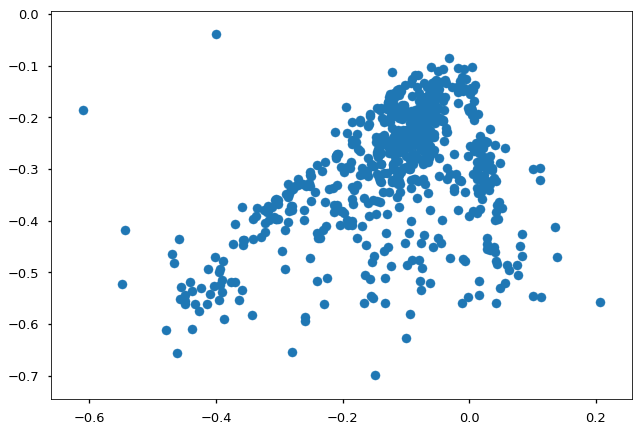

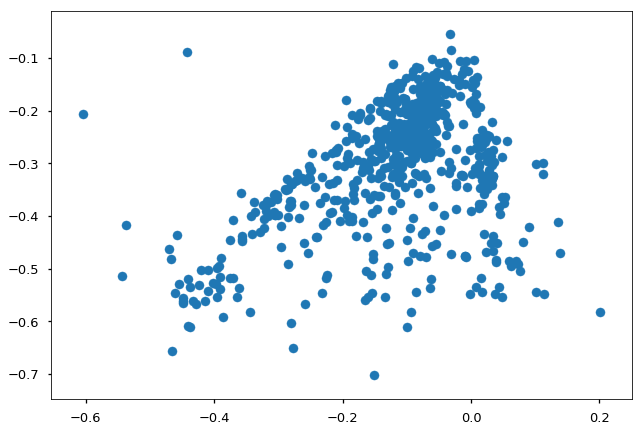

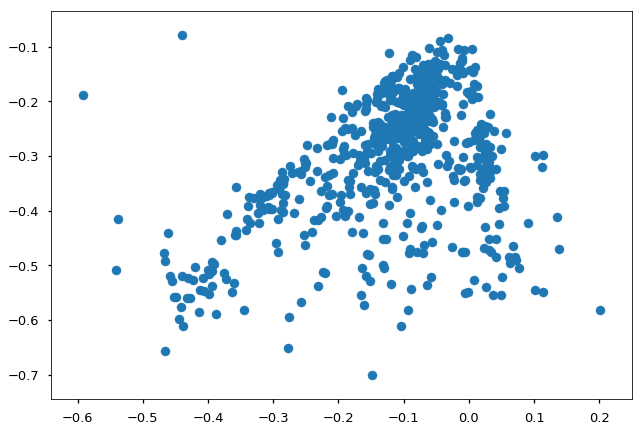

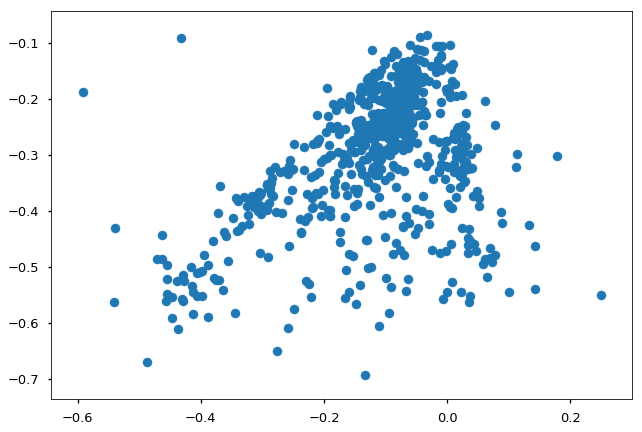

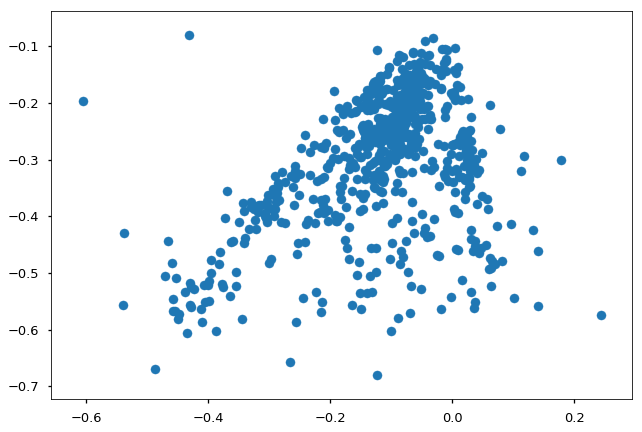

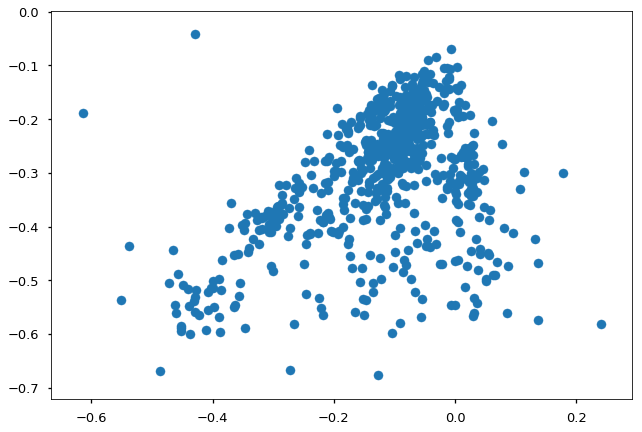

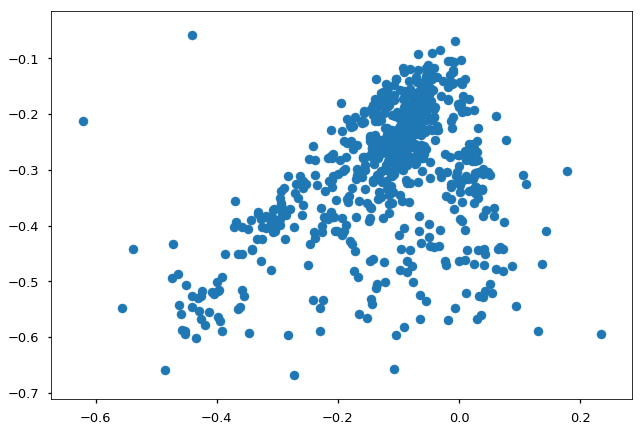

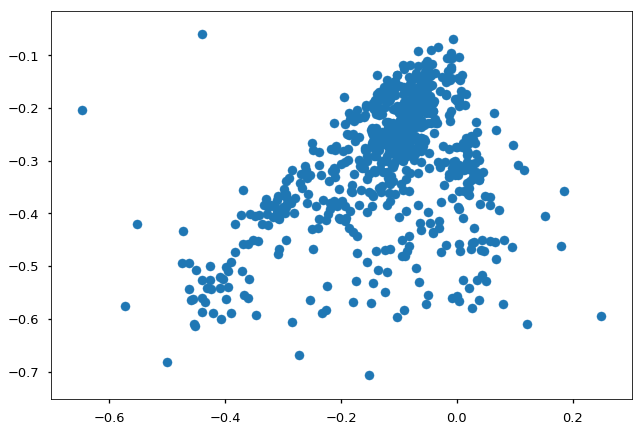

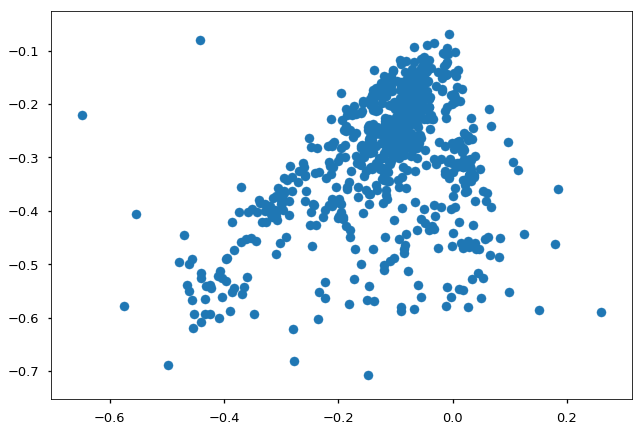

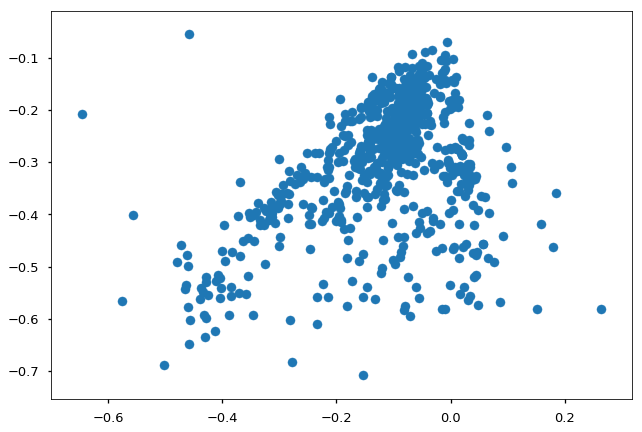

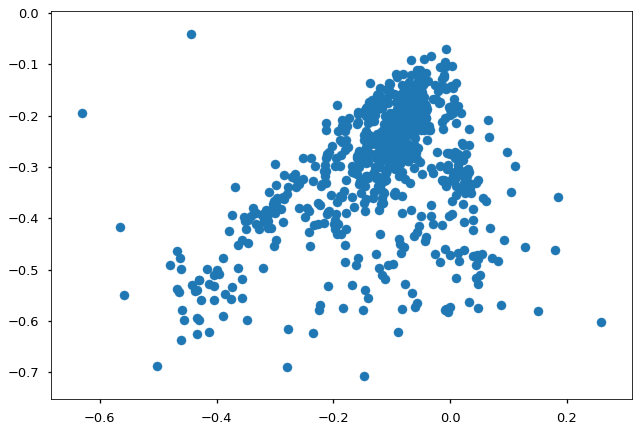

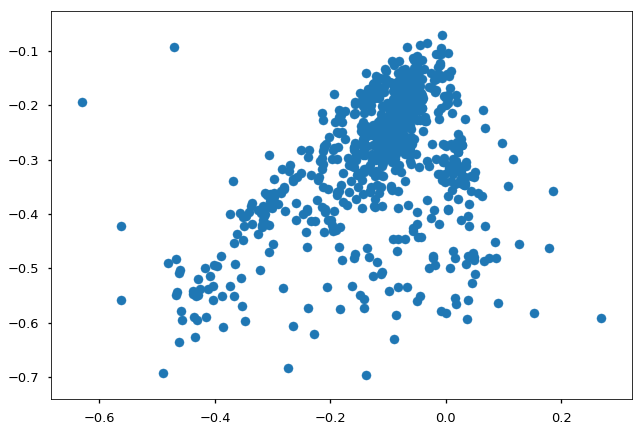

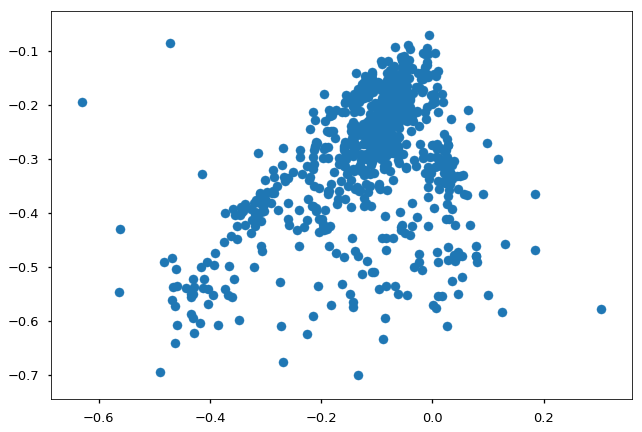

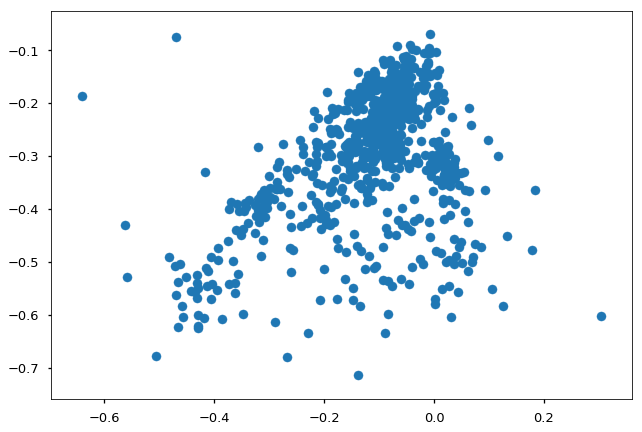

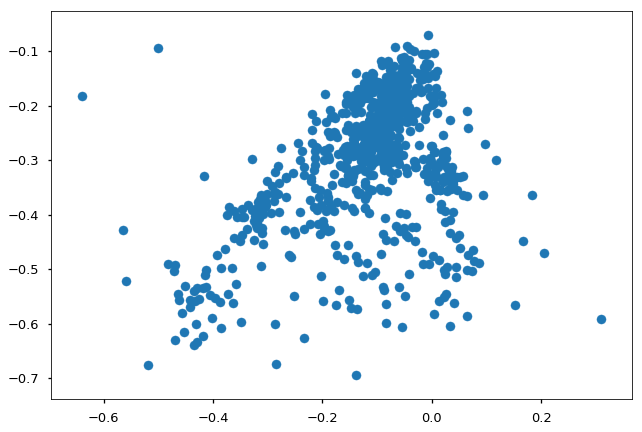

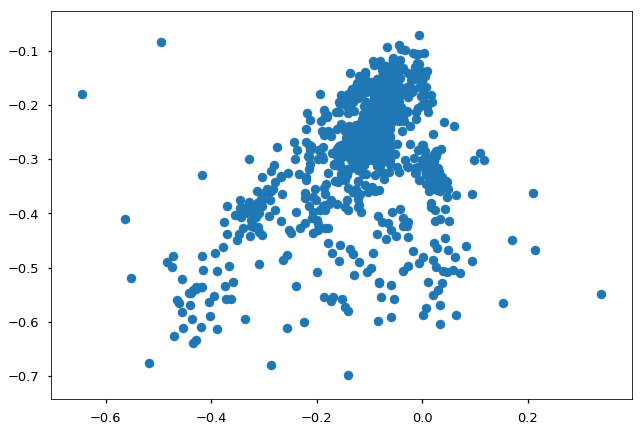

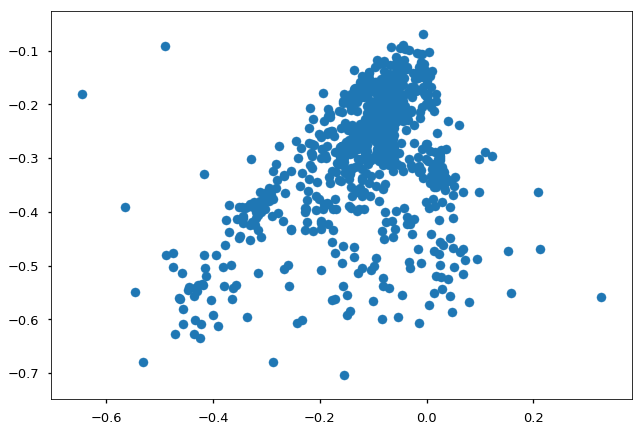

In [11]:
for i in range(1,number_of_steps):
    node_embedding = MacrostatesHandlers.time_index_macro(gd_directory,
                                         "deepwalk_online",
                                         "deepwalk",
                                         i)
    w = np.array(node_embedding.values())
    plt.scatter(w[:,0], w[:,1],label="{0}".format(i))
    plt.show()